# jet_model  user guide 


## basic  setup

In [1]:
%matplotlib inline
from jetset import jet_model
my_jet=jet_model.Jet(name='test',electron_distribution='lppl',)

In [2]:
my_jet.parameters.show_pars()

--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 N                | electron_density         | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,No           ]  
 gmax             | high-energy-cut-off      | Lorentz-factor   | +1.000000e+08 | [+1.000000e+00,No           ]  
 s                | LE_spectral_slope        |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01]  
 r                | spectral_curvature       |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01]  
 gamma0_log_parab | turn-over-energy         | Lorentz-factor   | +1.000000e+04 | [+1.00000

## setting the parameters

assume you want to change some of the parameters in your model:

In [3]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('R',val=5E14)
my_jet.set_par('N',val=1E3)

## evaluate and plot  the model


At this point we can evaluate the  emission for this jet model using the instruction

In [4]:
my_jet.eval()

and plot the corresponding SED:


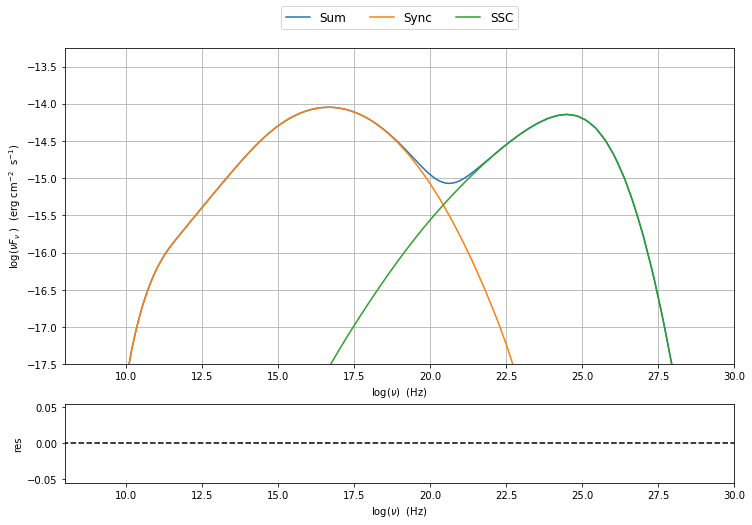

In [5]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_jet.plot_model(plot_obj=my_plot)
my_plot.rescale(y_min=-17.5,x_min=8)

alternatively, you can call the ``plot_model`` method without passing a ``Plot`` object

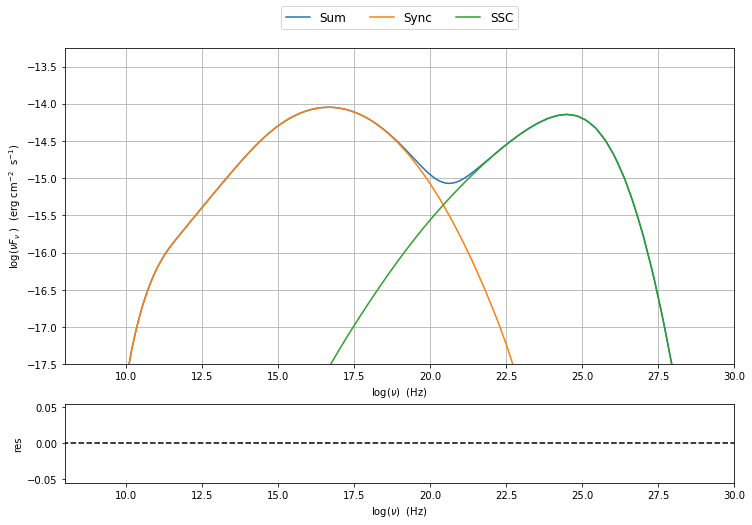

In [6]:
my_plot=my_jet.plot_model()
my_plot.rescale(y_min=-17.5,x_min=8)

the ``my_plot`` objet returned will be built on the fly by the  ``plot_model`` method

## comparing models on the same plot

to compare the same model after changing a parameter

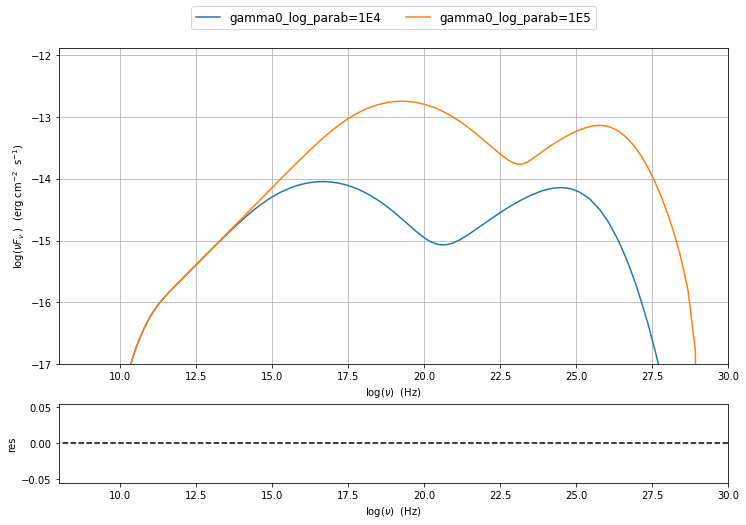

In [7]:
my_plot=PlotSED()

my_jet.plot_model(my_plot,label='gamma0_log_parab=1E4',comp='Sum')
my_jet.set_par('gamma0_log_parab',val=1.0E5)
my_jet.eval()
my_jet.plot_model(my_plot,label='gamma0_log_parab=1E5',comp='Sum')
my_plot.rescale(y_min=-17,x_min=8)

## saving a plot

to save the plot

In [8]:
my_plot.save('jet1.png')

## saving and loadaing  model

In [9]:
my_jet.save_model('test_model.dat')

In [10]:
my_jet_new=jet_model.Jet.load_model('test_model.dat')

Sum
Sync
SSC
-----------------------------------------------------------------------------------------
model parameters for jet model:
electron distribution type = lppl  
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 R                | region_size              | cm               | +3.000000e+15 | [+0.000000e+00,No           ]  
 B                | magnetic_field           | G                | +1.000000e-01 | [+0.000000e+00,No           ]  
 beam_obj         | beaming                  |                  | +1.000000e+01 | [+1.000000e+00,No           ]  
 z_cosm           | redshift                 |                  | +1.000000e-01 | [+0.000000e+00,No           ]  
 N                | electron_densi

## set  N from observed Flux

In [17]:
my_jet=jet_model.Jet(name='test',electron_distribution='lppl')

this is the initial value of N

In [18]:
my_jet.get_par_by_name('N').val

100.0

In [19]:

my_jet.set_N_from_nuFnu(nuFnu_obs=1E-14,nu_obs=1E12)

This is the updated value of N, obtained in order to match the given flux at the given frequencies

In [20]:
my_jet.get_par_by_name('N').val

30781.15088279897

In [21]:
my_jet.parameters.show_pars()

--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 N                | electron_density         | cm^-3            | +3.078115e+04 | [+0.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,No           ]  
 gmax             | high-energy-cut-off      | Lorentz-factor   | +1.000000e+08 | [+1.000000e+00,No           ]  
 s                | LE_spectral_slope        |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01]  
 r                | spectral_curvature       |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01]  
 gamma0_log_parab | turn-over-energy         | Lorentz-factor   | +1.000000e+04 | [+1.00000

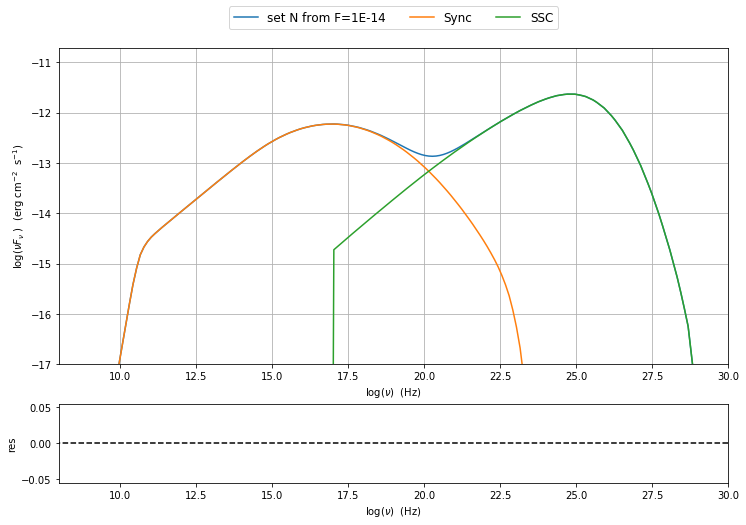

In [26]:
my_jet.eval()
my_plot=my_jet.plot_model(label='set N from F=1E-14')
my_plot.rescale(y_min=-17,x_min=8)

## setting beaming factor

It is possible to set the bemaing factor according to the realativistic BulkFactor and viewing angle, this can be done by setting the ``beaming_expr`` kw in the Jet constructor, possbile choiches are

* `delta` to provide directly the beaming factor (default)
* `bulk_theta` to provide the BulkFactor and the jet  viewing angle 

In [31]:
my_jet=jet_model.Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')

In [32]:
my_jet.parameters.show_pars()

--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 N                | electron_density         | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,No           ]  
 gmax             | high-energy-cut-off      | Lorentz-factor   | +1.000000e+08 | [+1.000000e+00,No           ]  
 s                | LE_spectral_slope        |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01]  
 r                | spectral_curvature       |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01]  
 gamma0_log_parab | turn-over-energy         | Lorentz-factor   | +1.000000e+04 | [+1.00000

In [34]:
print ('beaming factor=',my_jet.get_beaming())

beaming factor= 19.943844732554165


In [35]:
my_jet.set_par('theta',val=10.)

In [37]:
print('beaming factor=',my_jet.get_beaming())

beaming factor= 4.968041140891955


In [38]:
my_jet=jet_model.Jet(name='test',electron_distribution='lppl',beaming_expr='delta')

In [39]:
my_jet.parameters.show_pars()

--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 N                | electron_density         | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,No           ]  
 gmax             | high-energy-cut-off      | Lorentz-factor   | +1.000000e+08 | [+1.000000e+00,No           ]  
 s                | LE_spectral_slope        |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01]  
 r                | spectral_curvature       |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01]  
 gamma0_log_parab | turn-over-energy         | Lorentz-factor   | +1.000000e+04 | [+1.00000

## accessing individual components

It is possible to access specific spectral components of oura model

In [54]:
my_jet=jet_model.Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.eval()

In [44]:

my_jet.list_spectral_components()

Sum
Sync
SSC


the on-screen message is telling us which components have been evaluated. 

In [55]:
Sync=my_jet.get_spectral_component_by_name('Sync')

and from the ``SED`` object we can extract both the nu and nuFnu array

In [56]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [57]:
print(nuFnu_sync)


[1.00000000e-30 1.00000000e-30 1.00000000e-30 1.00000000e-30
 1.00000000e-30 1.00000000e-30 1.00000000e-30 1.00000000e-30
 1.00000000e-30 1.00000000e-30 1.00000000e-30 1.99195355e-26
 4.32084831e-26 9.42080231e-26 2.07796467e-25 4.64226006e-25
 1.07421835e-24 2.57262866e-24 6.33304102e-24 1.62172378e-23
 4.21830732e-23 1.10565753e-22 2.90749001e-22 7.64703810e-22
 2.01137205e-21 5.29044499e-21 1.39152631e-20 3.66005742e-20
 9.62674977e-20 2.53161731e-19 6.65135791e-19 1.74532879e-18
 4.47162406e-18 1.04798662e-17 2.22510780e-17 3.42183006e-17
 4.73795507e-17 5.98146121e-17 7.08393890e-17 8.27924884e-17
 9.58571035e-17 1.10361592e-16 1.26894305e-16 1.45793212e-16
 1.67429058e-16 1.92253041e-16 2.20741484e-16 2.53430172e-16
 2.90956596e-16 3.34034909e-16 3.83482107e-16 4.40231844e-16
 5.05364252e-16 5.80111171e-16 6.65860835e-16 7.64238867e-16
 8.77094393e-16 1.00644889e-15 1.15473841e-15 1.32470643e-15
 1.51922268e-15 1.74184487e-15 1.99657203e-15 2.28728218e-15
 2.61887108e-15 2.996993

## Numerical computation fine-tuning

### Changing the grid size for the electron distribution

In [111]:
myJet.get_gamma_grid_size()

1001L

('fill name', 'Sum')
('fill name', 'Sync')
('fill name', 'SSC')
running PyLab in interactive mode


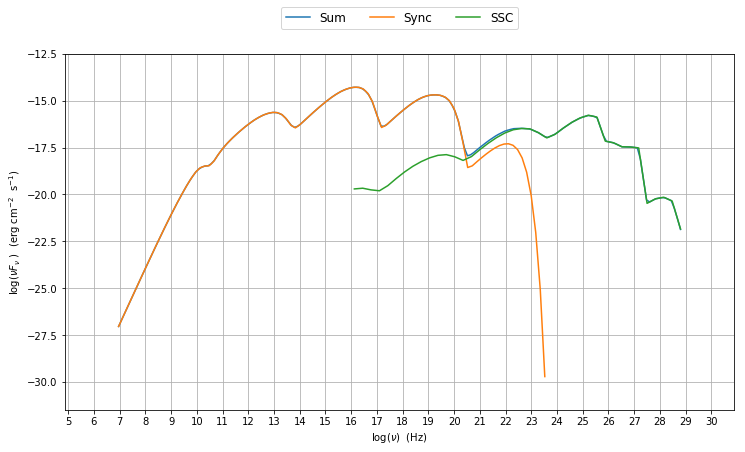

In [112]:
myJet.set_gamma_grid_size(10)
myJet.eval()
myJet.plot_model()

('fill name', 'Sum')
('fill name', 'Sync')
('fill name', 'SSC')
running PyLab in interactive mode


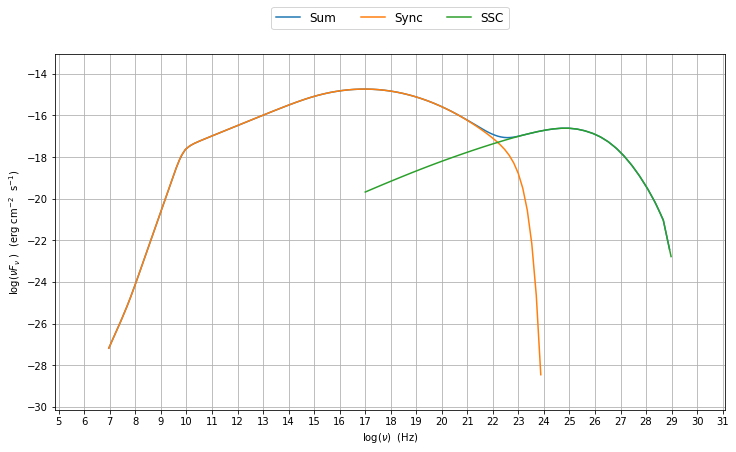

In [113]:
myJet.set_gamma_grid_size(100)
myJet.eval()
myJet.plot_model()

('fill name', 'Sum')
('fill name', 'Sync')
('fill name', 'SSC')
running PyLab in interactive mode


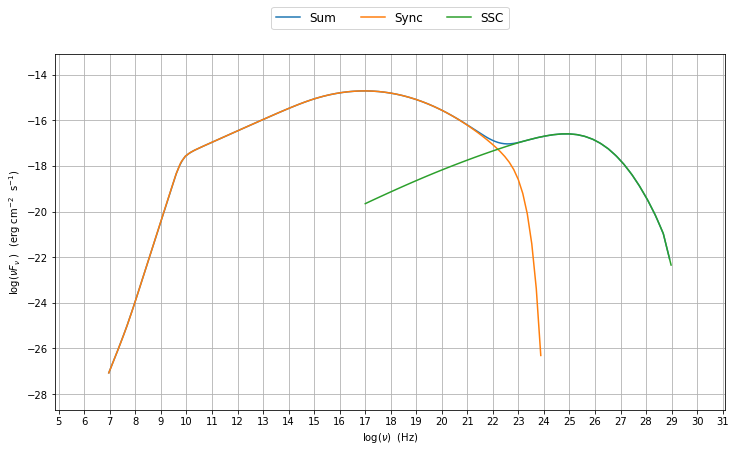

In [114]:
myJet.set_gamma_grid_size(1000)
myJet.eval()
myJet.plot_model()

('fill name', 'Sum')
('fill name', 'Sync')
('fill name', 'SSC')
running PyLab in interactive mode


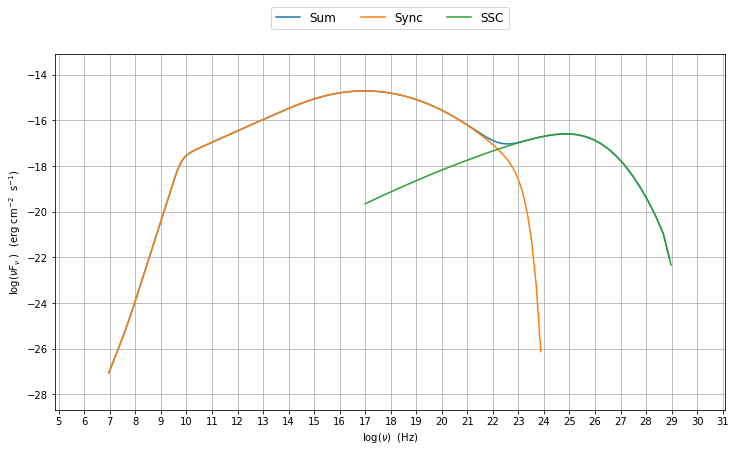

In [115]:
myJet.set_gamma_grid_size(10000)
myJet.eval()
myJet.plot_model()

### Changing the grid size  for the seed photons

In [116]:
myJet=jet_model.Jet(name='test',electron_distribution='lppl',)


directory .//test_jet_prod/ already existing
removing existing dir
the directory .//test_jet_prod/ has been created


In [117]:
myJet.get_seed_nu_size()

100L

('fill name', 'Sum')
('fill name', 'Sync')
('fill name', 'SSC')
running PyLab in interactive mode


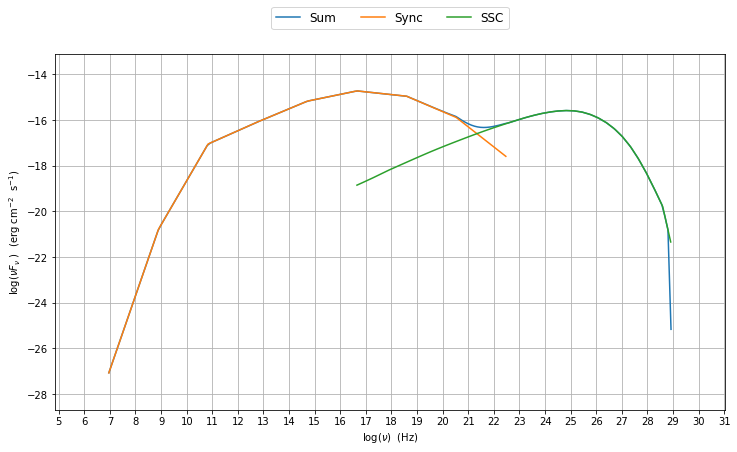

In [118]:
myJet.set_seed_nu_size(10)
myJet.eval()
myJet.plot_model()

### Changing the grid size  for the IC process spectra

In [119]:
myJet=jet_model.Jet(name='test',electron_distribution='lppl',)

directory .//test_jet_prod/ already existing
removing existing dir
the directory .//test_jet_prod/ has been created


In [120]:
myJet.get_IC_nu_size()

50L

('fill name', 'Sum')
('fill name', 'Sync')
('fill name', 'SSC')
running PyLab in interactive mode


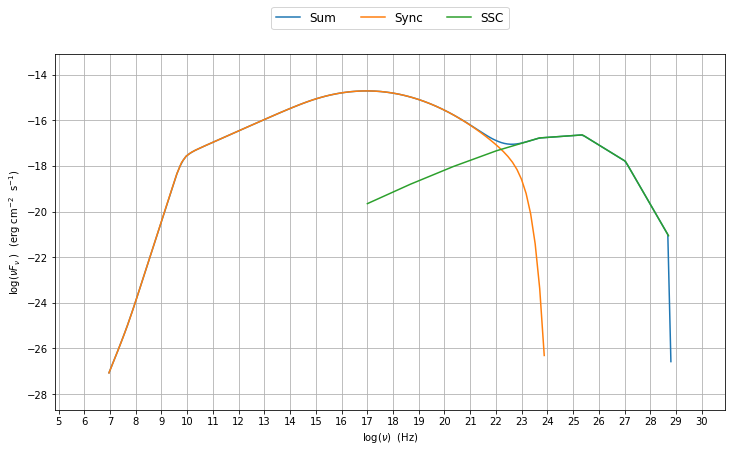

In [121]:
myJet.set_IC_nu_size(10)
myJet.eval()
myJet.plot_model()

('fill name', 'Sum')
('fill name', 'Sync')
('fill name', 'SSC')
running PyLab in interactive mode


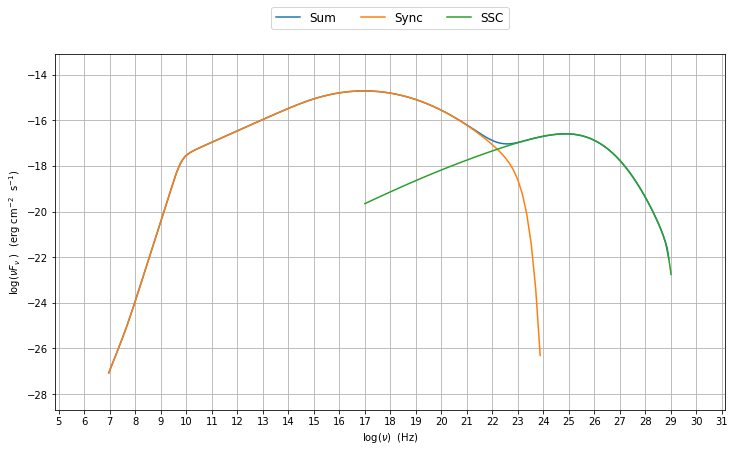

In [122]:
myJet.set_IC_nu_size(100)
myJet.eval()
myJet.plot_model()

## External Compotn

### Broad Line Region

In [124]:
myJet=jet_model.Jet(name='BLR example',electron_distribution='bkn')
myJet.add_EC_component('BLR')
myJet.set_gamma_grid_size(1000)
myJet.show_model()

directory .//BLR example_jet_prod/ already existing
removing existing dir
the directory .//BLR example_jet_prod/ has been created
-----------------------------------------------------------------------------------------
model parameters for jet model:

electron distribution type = bkn  
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 gmax             | high-energy-cut-off      | Lorentz-factor   | +1.000000e+08 | [+1.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,No           ]  
 N                | electron_density         | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ]  
 gamma_break      | turn-over-e

('fill name', 'Sum')
('fill name', 'Sync')
('fill name', 'SSC')
('fill name', 'EC_BLR')
('fill name', 'Disk')
running PyLab in interactive mode


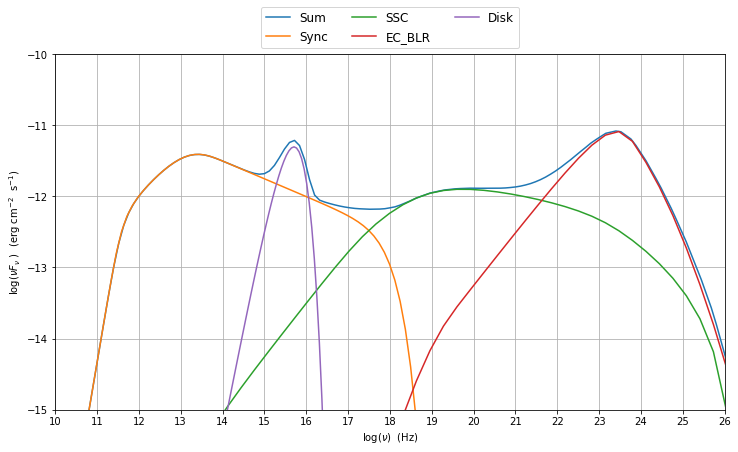

In [125]:
myJet.set_par('L_disk',val=1E46)
myJet.set_par('gmax',val=1E5)
myJet.set_par('gmin',val=2.)

myJet.set_par('p',val=1.5)
myJet.set_par('p_1',val=3.5)
myJet.set_par('R',val=5E15)
myJet.set_par('B',val=1.0)
myJet.set_par('z_cosm',val=0.6)
myJet.set_par('beam_obj',val=25)
myJet.set_par('gamma_break',val=5E2)

myJet.set_N_from_nuFnu(nuFnu_obs=1E-12,nu_obs=1E12)

myJet.eval()


my_plot=Plot()
my_plot=myJet.plot_model(plot_obj=my_plot,autoscale=True)

my_plot.y_min=-15
my_plot.y_max=-10
my_plot.x_max=26
my_plot.x_min=10

my_plot.rescale()

### Dusty Torus

In [126]:
myJet.add_EC_component('DT')
myJet.show_model()

-----------------------------------------------------------------------------------------
model parameters for jet model:

electron distribution type = bkn  
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 gmax             | high-energy-cut-off      | Lorentz-factor   | +1.000000e+05 | [+1.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,No           ]  
 N                | electron_density         | cm^-3            | +8.514734e+03 | [+0.000000e+00,No           ]  
 gamma_break      | turn-over-energy         | Lorentz-factor   | +5.000000e+02 | [+1.000000e+00,No           ]  
 p                | LE_spectral_slope        | 

('fill name', 'Sum')
('fill name', 'Sync')
('fill name', 'SSC')
('fill name', 'EC_BLR')
('fill name', 'Disk')
('fill name', 'EC_DT')
('fill name', 'DT')
running PyLab in interactive mode


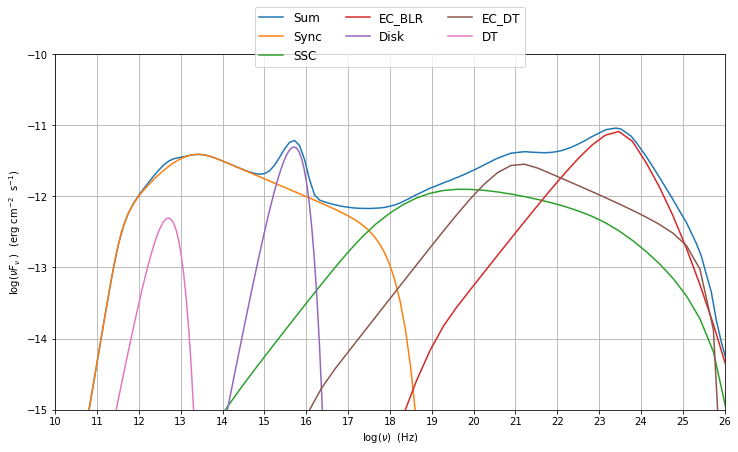

In [127]:

myJet.eval()


my_plot=Plot()
my_plot=myJet.plot_model(plot_obj=my_plot,autoscale=True)

my_plot.y_min=-15
my_plot.y_max=-10
my_plot.x_max=26
my_plot.x_min=10

my_plot.rescale()